
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

In [12]:
import pandas as pd
df = pd.read_csv('shopping_trends.csv')

df.sample(6)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2393,2394,58,Male,Socks,Clothing,97,Louisiana,M,Brown,Winter,5.0,No,Debit Card,2-Day Shipping,No,No,38,PayPal,Every 3 Months
1037,1038,52,Male,Jewelry,Accessories,25,Rhode Island,XL,Brown,Spring,3.4,Yes,Bank Transfer,Standard,Yes,Yes,48,Debit Card,Quarterly
2204,2205,20,Male,Jeans,Clothing,41,Oregon,S,Lavender,Winter,3.4,No,Venmo,2-Day Shipping,No,No,6,Debit Card,Monthly
175,176,53,Male,Coat,Outerwear,86,Oklahoma,L,Violet,Fall,2.8,Yes,Debit Card,Next Day Air,Yes,Yes,2,Bank Transfer,Annually
2381,2382,62,Male,Sandals,Footwear,23,Wisconsin,M,Teal,Summer,4.5,No,Bank Transfer,Free Shipping,No,No,23,PayPal,Annually
525,526,51,Male,Coat,Outerwear,37,Iowa,M,Cyan,Spring,3.2,Yes,Credit Card,Next Day Air,Yes,Yes,41,Debit Card,Monthly


In [13]:
df.set_index('Customer ID', inplace=True)

In [14]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [15]:
df.isna().sum()

,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0
Review Rating,0


In [16]:
color_dict = {
    'Gray': 'gray',
    'Maroon': 'maroon',
    'Turquoise': 'turquoise',
    'White': 'white',
    'Charcoal': 'dimgray',
    'Silver': 'silver',
    'Pink': 'pink',
    'Purple': 'purple',
    'Olive': 'olive',
    'Gold': 'gold',
    'Violet': 'violet',
    'Teal': 'teal',
    'Lavender': 'lavender',
    'Black': 'black',
    'Green': 'green',
    'Peach': 'peachpuff',
    'Red': 'red',
    'Cyan': 'cyan',
    'Brown': 'brown',
    'Beige': 'beige',
    'Orange': 'darkorange',
    'Indigo': 'indigo',
    'Yellow': 'yellow',
    'Magenta': 'magenta',
    'Blue': 'blue',
}

df['Color'] = df['Color'].map(color_dict)

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

## Посмотрим и поанализируем наши данные

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 55, 65, float('inf')],
                        labels=['Меньше 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                        include_lowest=True)

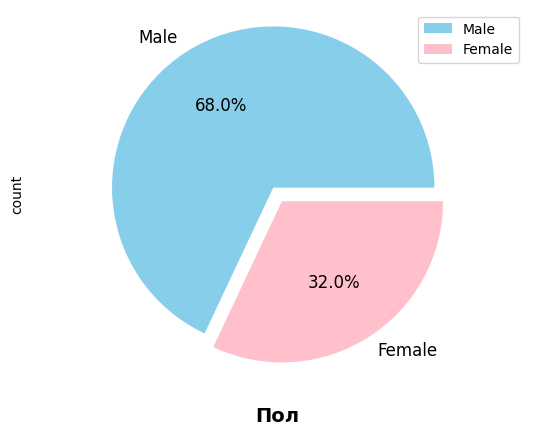

In [49]:
counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%1.1f%%', colors=['skyblue', 'Pink'])
plt.xlabel('Пол', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

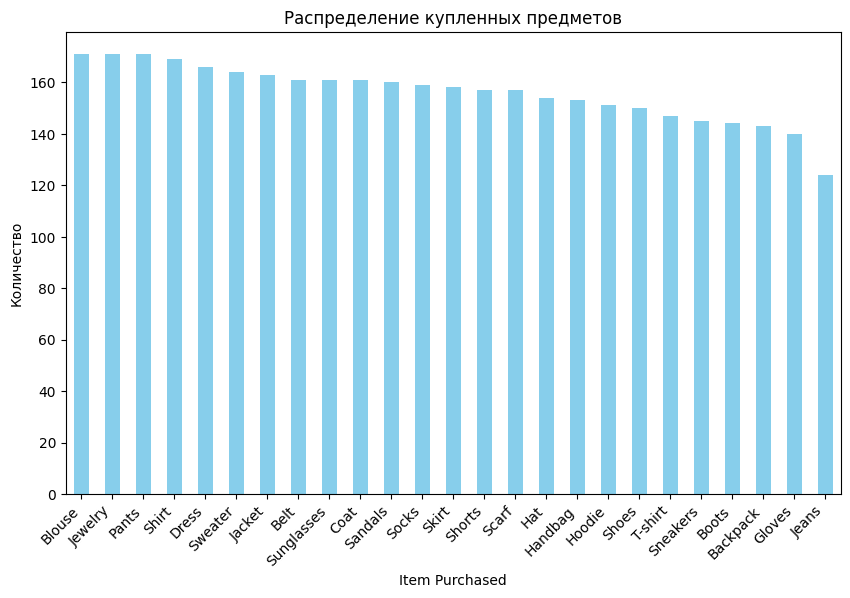

In [44]:
item_counts = df['Item Purchased'].value_counts()

plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение купленных предметов')
plt.xlabel('Item Purchased')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
colors = ['Red', 'Green', 'Yellow', 'Blue']

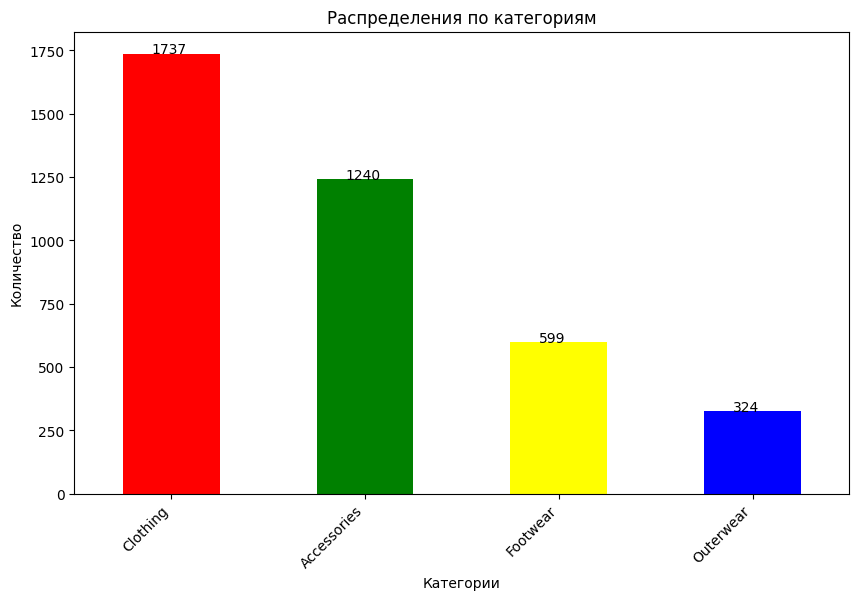

In [33]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
bars = category_counts.plot(kind='bar', color=colors)

for bar, count in zip(bars.patches, category_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), fontsize=10)

plt.title('Распределения по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.show()

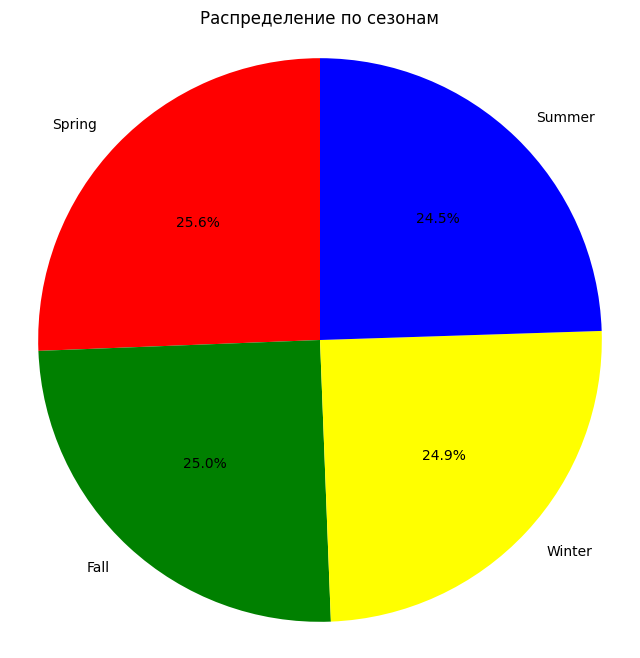

In [35]:
season_counts = df['Season'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Распределение по сезонам')
plt.axis('equal')

plt.show()

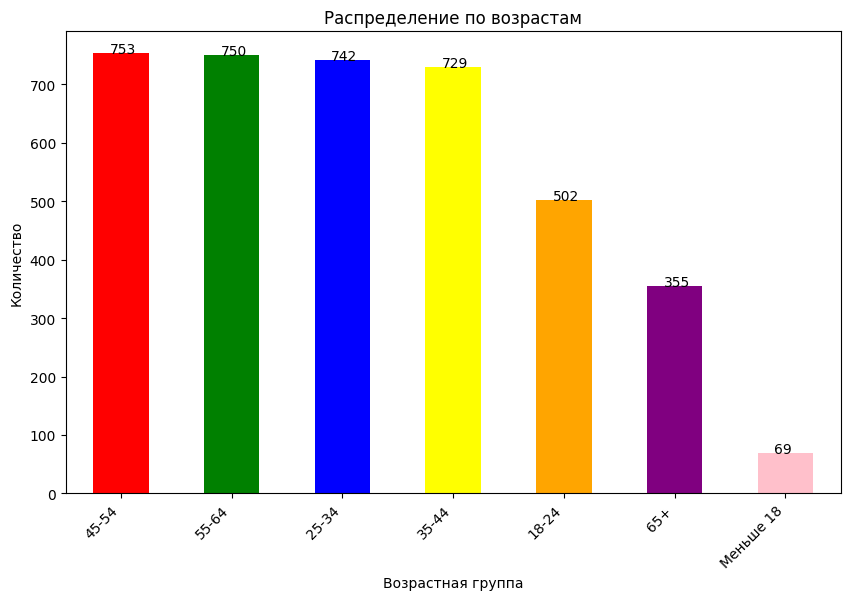

In [64]:
age_group_counts = df['Age Group'].value_counts()
colors = ["red", "green", "blue", "yellow", "orange", 'purple', 'pink']
plt.figure(figsize=(10, 6))
bars = age_group_counts.plot(kind='bar', color=colors)

for bar, count in zip(bars.patches, age_group_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), fontsize=10)

plt.title('Распределение по возрастам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.show()

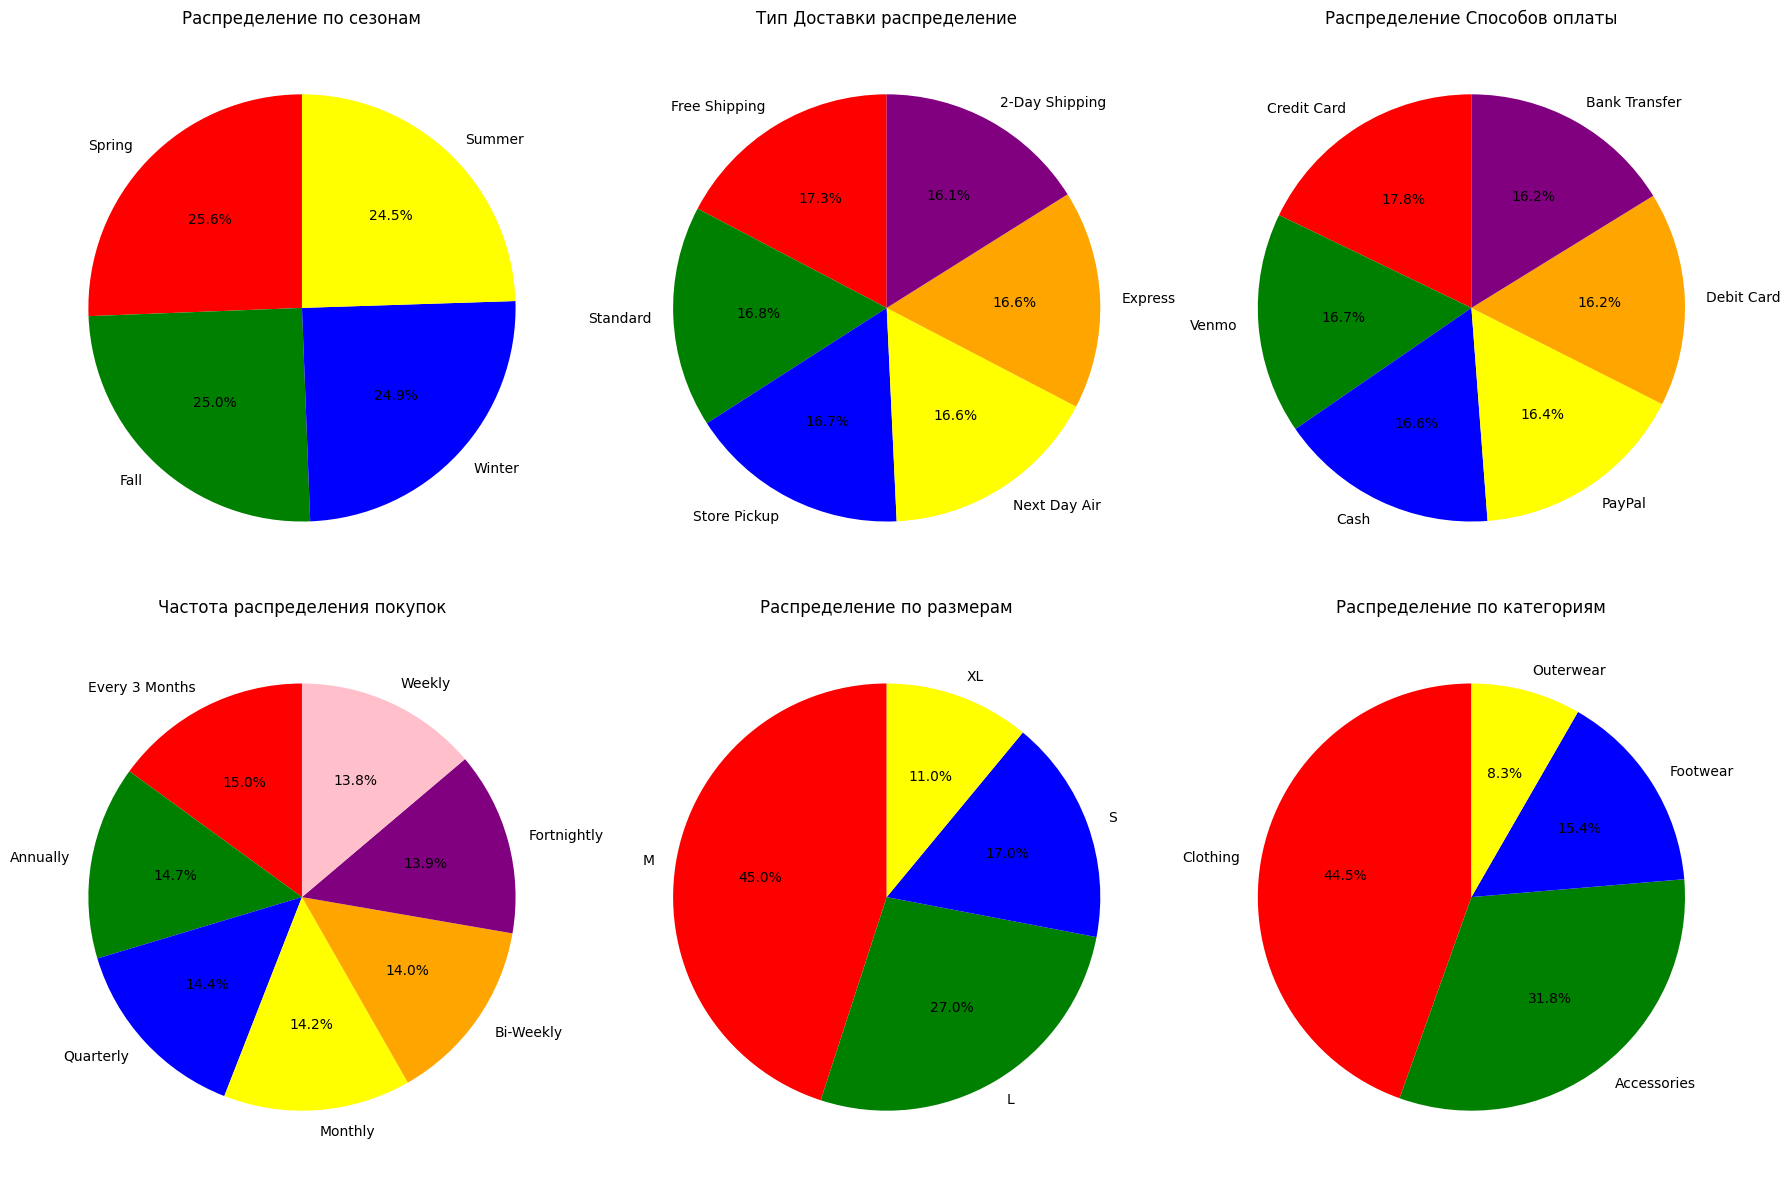

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

season_counts = df['Season'].value_counts()
axes[0, 0].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Распределение по сезонам')
axes[0, 0].axis('equal')

shipping_counts = df['Shipping Type'].value_counts()
axes[0, 1].pie(shipping_counts, labels=shipping_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 1].set_title('Тип Доставки распределение')
axes[0, 1].axis('equal')

payment_counts = df['Payment Method'].value_counts()
axes[0, 2].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 2].set_title('Распределение Способов оплаты')
axes[0, 2].axis('equal')

frequency_counts = df['Frequency of Purchases'].value_counts()
axes[1, 0].pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 0].set_title('Частота распределения покупок')
axes[1, 0].axis('equal')

size_counts = df['Size'].value_counts()
axes[1, 1].pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 1].set_title('Распределение по размерам')
axes[1, 1].axis('equal')

category_counts = df['Category'].value_counts()
axes[1, 2].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[1, 2].set_title('Распределение по категориям')
axes[1, 2].axis('equal')

plt.tight_layout()
plt.show()

<ipython-input-57-f226383c4241>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index='Age Group', columns='Gender', aggfunc='size', fill_value=0)


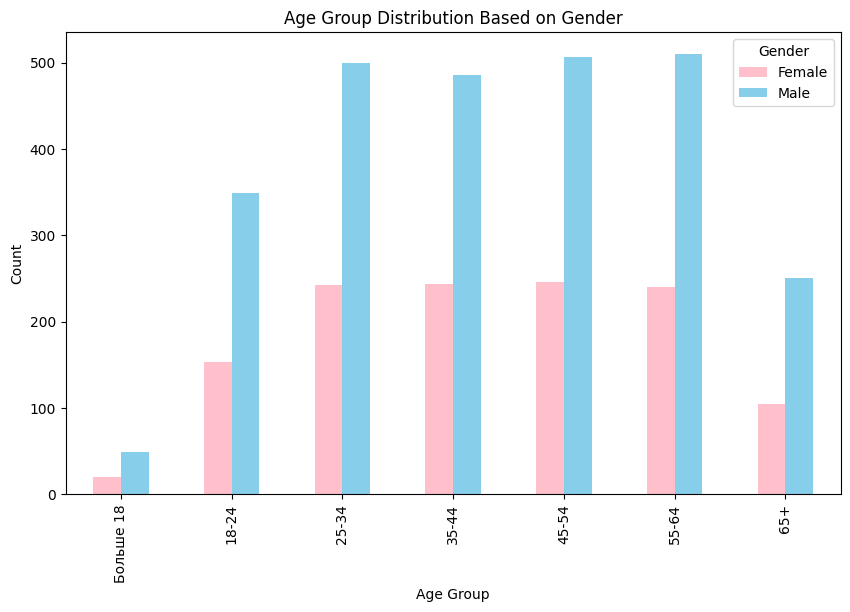

In [57]:
pivot_df = df.pivot_table(index='Age Group', columns='Gender', aggfunc='size', fill_value=0)

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', color=['pink', 'skyblue'], figsize=(10, 6))

ax.set_title('Age Group Distribution Based on Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(title='Gender')

plt.show()

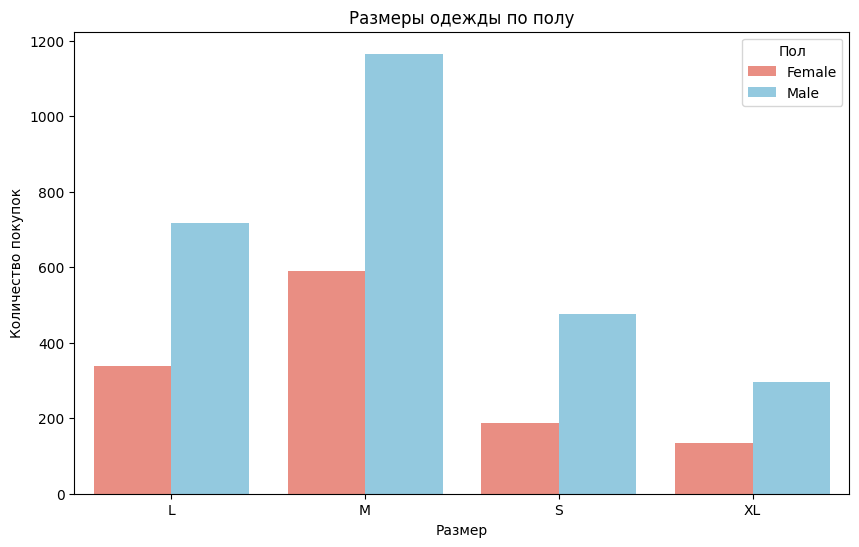

In [80]:
size_gender_count = df.groupby(['Size', 'Gender']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Size', y='Count', hue='Gender', data=size_gender_count, palette=['salmon', 'skyblue'])
plt.title('Размеры одежды по полу')
plt.xlabel('Размер')
plt.ylabel('Количество покупок')
plt.legend(title='Пол')
plt.show()

Видно, что наши данные очень равномерно распределены, поэтому тут придется наугад смотреть интересные выборки. Тут уже просто фантазия автора на высоте.

<Axes: xlabel='Gender', ylabel='count'>

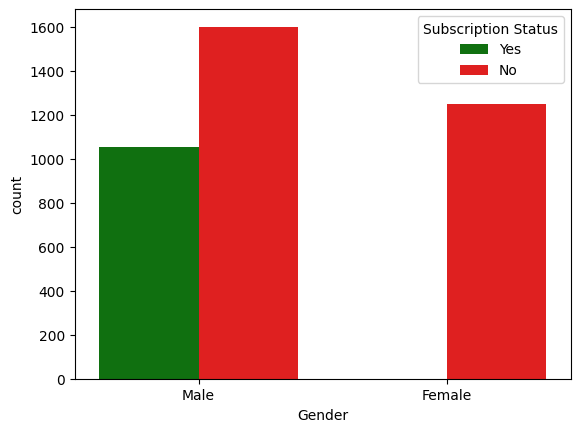

In [59]:
sns.countplot(data=df, x='Gender', hue='Subscription Status', palette=['Green', 'Red'])

Опа, первая гипотеза - только мужчины пользуются нашей подпиской

<Axes: xlabel='Gender', ylabel='count'>

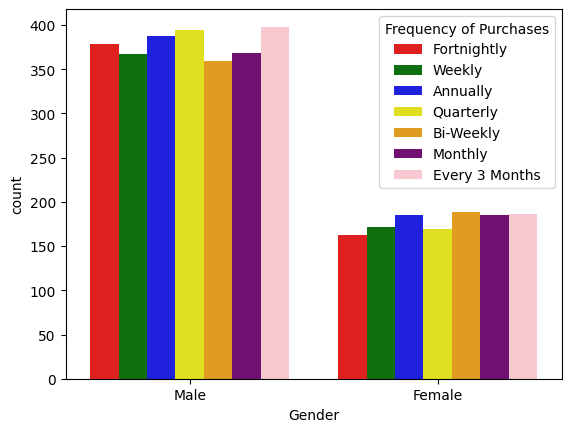

In [60]:
sns.countplot(data=df, x='Gender', hue='Frequency of Purchases', palette=colors)

Чаще всего мужчины покупают что-то ежеквартально или каждые 3 месяца, а женщины любят чаще или ежегодно

<ipython-input-65-f68bcfa85864>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_age_group = df.groupby(['Age Group', 'Payment Method']).size().reset_index(name='Count')


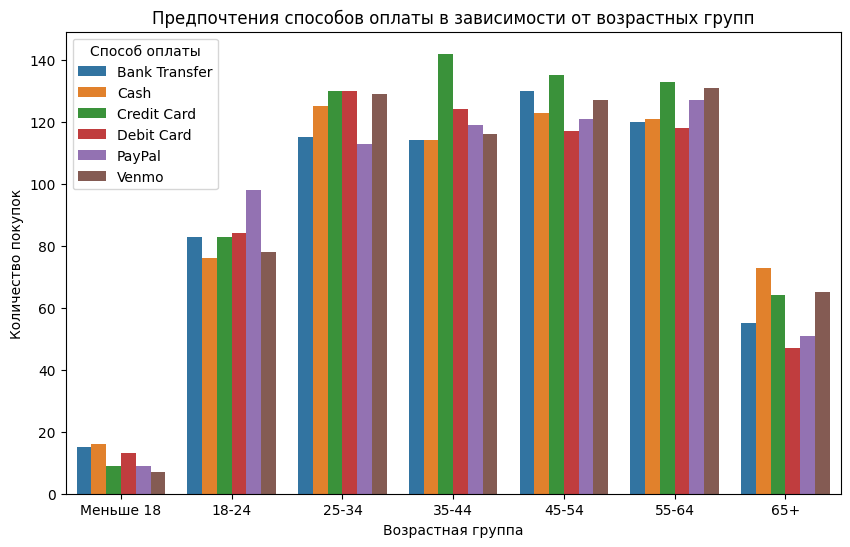

In [65]:
payment_age_group = df.groupby(['Age Group', 'Payment Method']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Count', hue='Payment Method', data=payment_age_group)

plt.title('Предпочтения способов оплаты в зависимости от возрастных групп')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество покупок')
plt.legend(title='Способ оплаты')
plt.show()

Заметим, что более молодое поколение предпочитает оплачивать переводом или наличными, а возрастная группа 35-44 лет покупает все с помощью кредитной карточки, скорей всего из-за того, что они могут её себе оформить.

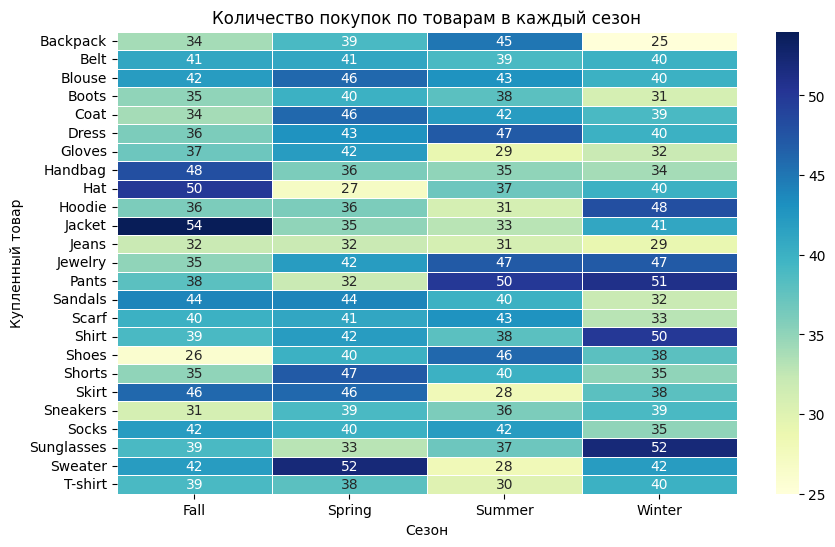

In [79]:
season_item_count = df.groupby(['Season', 'Item Purchased']).size().reset_index(name='Count')

pivot_table = season_item_count.pivot_table(index='Item Purchased', columns='Season', values='Count', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', cbar=True, linewidths=.5)

plt.title('Количество покупок по товарам в каждый сезон')
plt.xlabel('Сезон')
plt.ylabel('Купленный товар')
plt.show()

Можно заметить, что куртки и шапки (вся вверхняя одежда) покупается осенья перед зимним сезоном, а летом продажи этих товаров снижается.

<ipython-input-82-207435ad6934>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_frequency = df.groupby(['Age Group', 'Frequency of Purchases']).size().reset_index(name='Count')


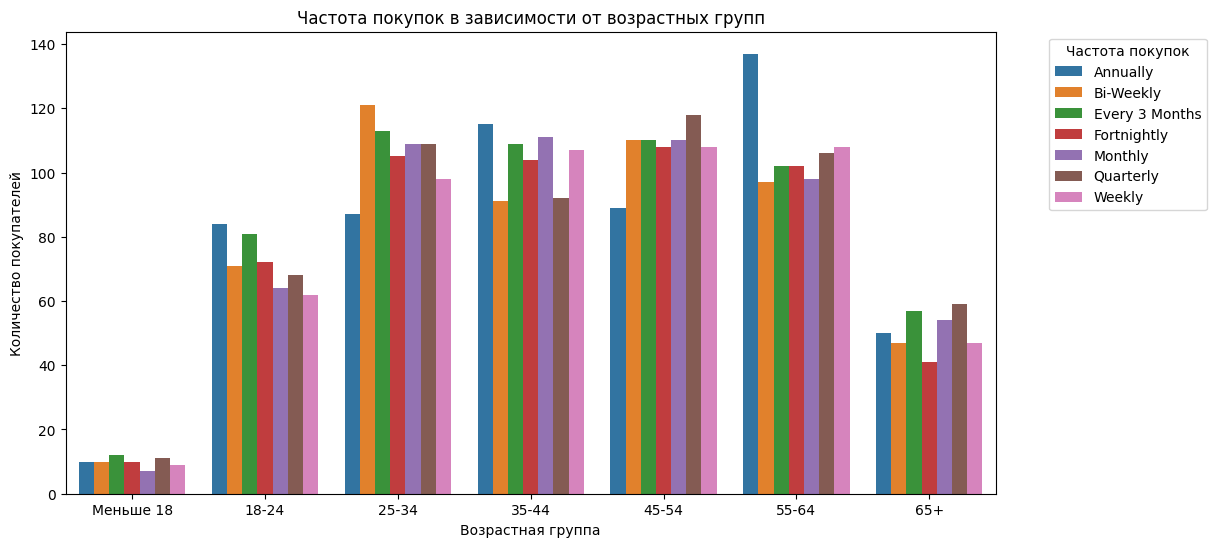

In [82]:
purchase_frequency = df.groupby(['Age Group', 'Frequency of Purchases']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Count', hue='Frequency of Purchases', data=purchase_frequency)

plt.title('Частота покупок в зависимости от возрастных групп')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество покупателей')
plt.legend(title='Частота покупок', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Заметно, что люди меньше 18 лет покупают обычно каждые 3 месяца, а люди 55-64 лет покупают ежегодно.

## Весь список гипотез:

1. Только мужчины являются пользователями нашей подписки.
2. Мужчины чаще предпочитают совершать покупки ежеквартально (раз в три месяца), в то время как женщины чаще совершают покупки с большей частотой, либо ежегодно.
3. Более молодое поколение предпочитает оплачивать покупки переводом или наличными, в то время как возрастная группа 35-44 лет чаще использует кредитные карты для оплаты, вероятно, из-за возможности оформления кредитной карты.
4. Куртки и шапки (вся верхняя одежда) покупаются преимущественно осенью перед зимним сезоном, в то время как летом продажи этих товаров значительно снижаются.
5. Люди младше 18 лет предпочитают совершать покупки каждые три месяца, в то время как люди в возрасте 55-64 лет обычно совершают покупки ежегодно.

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

In [83]:
most_popular_item = df['Item Purchased'].mode()[0]
print("Самый популярный товар:", most_popular_item)

Самый популярный товар: Blouse


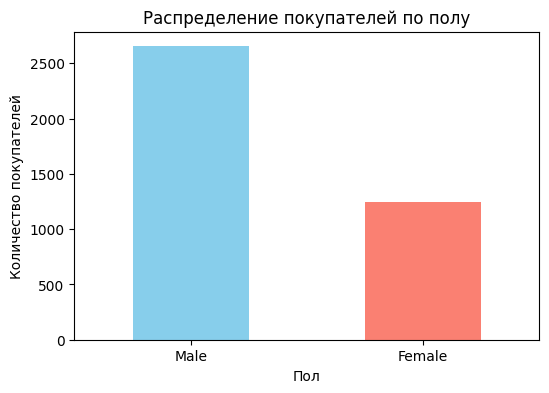

In [86]:
gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.xticks(rotation=0)
plt.show()

In [88]:
total_spent_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()

average_spent_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].mean()

total_spent_by_age = df.groupby('Age Group')['Purchase Amount (USD)'].sum()

print("Общая сумма по полу:", total_spent_by_gender)
print("Средняя сумма по полу:", average_spent_by_gender)
print("Общая сумма по возрастным группам:", total_spent_by_age)

Общая сумма по полу: Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64
Средняя сумма по полу: Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64
Общая сумма по возрастным группам: Age Group
Меньше 18     4139
18-24        30491
25-34        44342
35-44        43234
45-54        45619
55-64        44352
65+          20904
Name: Purchase Amount (USD), dtype: int64


<ipython-input-88-4928c7a1b8b5>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spent_by_age = df.groupby('Age Group')['Purchase Amount (USD)'].sum()


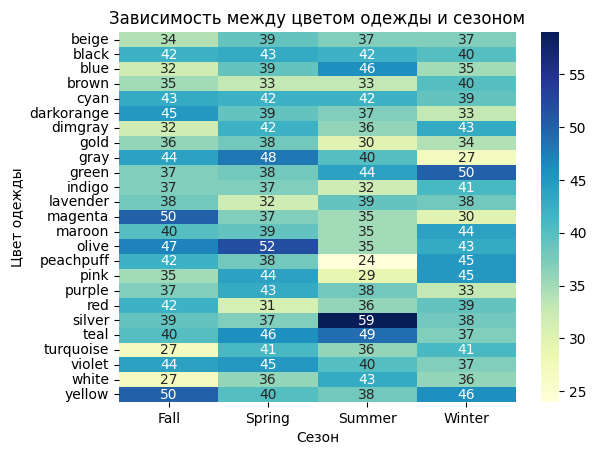

In [89]:
color_season_crosstab = pd.crosstab(df['Color'], df['Season'])
sns.heatmap(color_season_crosstab, annot=True, cmap='YlGnBu')
plt.title('Зависимость между цветом одежды и сезоном')
plt.xlabel('Сезон')
plt.ylabel('Цвет одежды')
plt.show()

MAU (уникальные пользователи) по сезонам:
 Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Item Purchased, dtype: int64


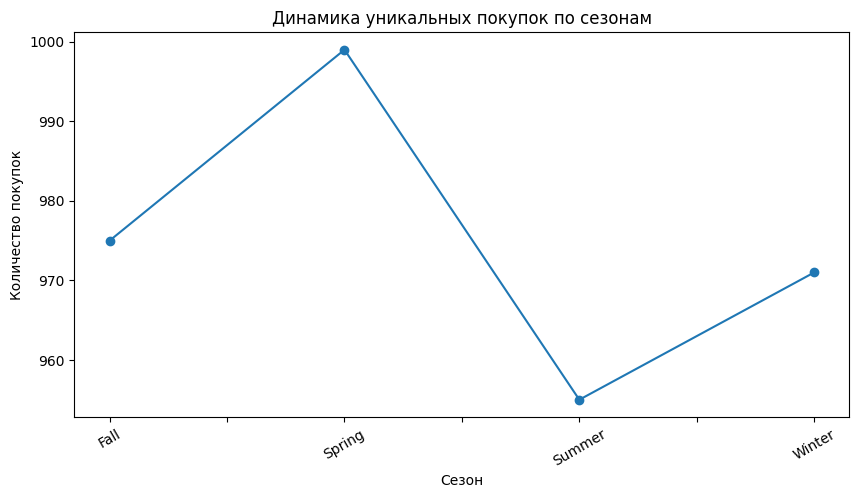

In [97]:
mau = df.groupby('Season')['Item Purchased'].count()
print("MAU (уникальные пользователи) по сезонам:\n", mau)

plt.figure(figsize=(10, 5))
mau.plot(kind='line', marker='o')
plt.title('Динамика уникальных покупок по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Количество покупок')
plt.xticks(rotation=30)
plt.show()

In [98]:
item_names = ''.join(df['Item Purchased'])
letter_count = pd.Series(list(item_names)).value_counts()
most_popular_letter = letter_count.idxmax()
most_popular_letter_count = letter_count.max()
print(f"Самая популярная буква в названии одежды: '{most_popular_letter}' (Количество: {most_popular_letter_count})")

Самая популярная буква в названии одежды: 's' (Количество: 2483)


<h1>Задание 2</h1>

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [101]:
import pandas as pd
data = pd.read_csv('drinks.csv')

In [103]:
data.sample(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
73,Haiti,1,326,1,5.9
34,Chad,15,1,1,0.4
1,Albania,89,132,54,4.9
37,Colombia,159,76,3,4.2
160,Spain,284,157,112,10.0


In [116]:
country_group = data.groupby('country').agg({'beer_servings': 'sum' , 'spirit_servings' : 'sum', 'wine_servings' : 'sum'}).reset_index()
country_group

,country,beer_servings,spirit_servings,wine_servings
0,Afghanistan,0,0,0
1,Albania,89,132,54
2,Algeria,25,0,14
3,Andorra,245,138,312
4,Angola,217,57,45
...,...,...,...,...
188,Venezuela,333,100,3
189,Vietnam,111,2,1
190,Yemen,6,0,0
191,Zambia,32,19,4


In [117]:
most_wine = country_group.loc[country_group['wine_servings'].idxmax()]
most_beer = country_group.loc[country_group['beer_servings'].idxmax()]
most_spirit = country_group.loc[country_group['spirit_servings'].idxmax()]

print(f"Страна с наибольшим потреблением вина: {most_wine['country']} ({most_wine['wine_servings']})")
print(f"Страна с наибольшим потреблением пива: {most_beer['country']} ({most_beer['beer_servings']})")
print(f"Страна с наибольшим потреблением спиртных напитков: {most_spirit['country']} ({most_spirit['spirit_servings']})")

Страна с наибольшим потреблением вина: France (370)
Страна с наибольшим потреблением пива: Namibia (376)
Страна с наибольшим потреблением спиртных напитков: Grenada (438)


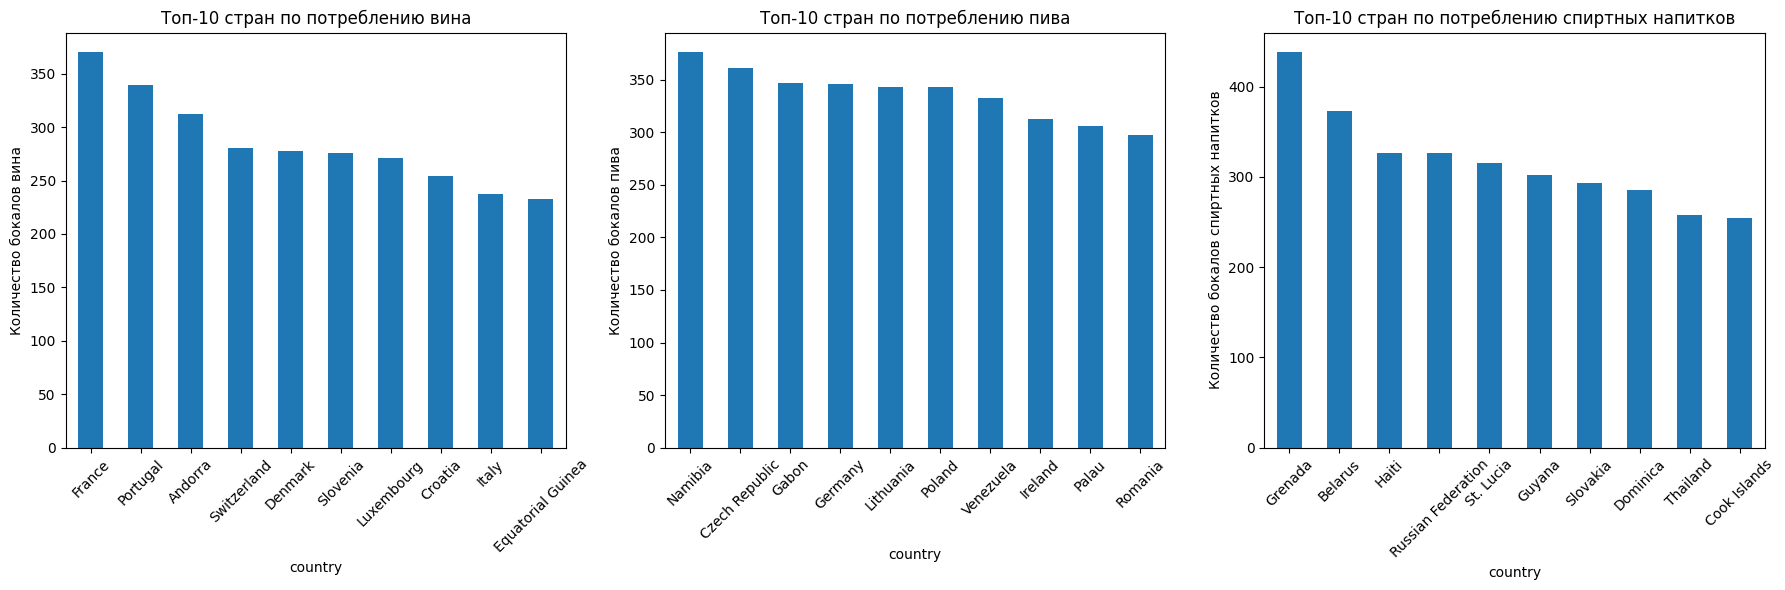

In [132]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

country_group.sort_values('wine_servings', ascending=False).head(10).plot(
    x='country',
    y='wine_servings',
    kind='bar',
    ax=axes[0],
    legend=False
)
axes[0].set_title('Топ-10 стран по потреблению вина')
axes[0].set_ylabel('Количество бокалов вина')
axes[0].tick_params(axis='x', rotation=45)


country_group.sort_values('beer_servings', ascending=False).head(10).plot(
    x='country',
    y='beer_servings',
    kind='bar',
    ax=axes[1],
    legend=False
)
axes[1].set_title('Топ-10 стран по потреблению пива')
axes[1].set_ylabel('Количество бокалов пива')
axes[1].tick_params(axis='x', rotation=45)


country_group.sort_values('spirit_servings', ascending=False).head(10).plot(
    x='country',
    y='spirit_servings',
    kind='bar',
    ax=axes[2],
    legend=False
)
axes[2].set_title('Топ-10 стран по потреблению спиртных напитков')
axes[2].set_ylabel('Количество бокалов спиртных напитков')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<h1>Задание 3</h1>

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [134]:
tarantino = pd.read_csv('/content/tarantino.csv')

In [137]:
tarantino.sample(6)

,movie,type,word,minutes_in
607,Pulp Fiction,word,fuck,57.87
1317,Django Unchained,word,goddamn,81.68
186,Reservoir Dogs,word,fuck,41.43
201,Reservoir Dogs,word,asshead,42.86
1728,Jackie Brown,word,fucking,75.63
1577,Jackie Brown,word,shit,16.55


In [139]:
tarantino['type'].unique()

array(['word', 'death'], dtype=object)

In [159]:
summary = tarantino.groupby('movie')['type'].value_counts().unstack(fill_value=0)

summary['ratio'] = summary['word'] / summary['death']

In [160]:
summary

type,death,word,ratio
movie,,,
Django Unchained,47,262,5.574468
Inglorious Basterds,48,58,1.208333
Jackie Brown,4,368,92.000000
Kill Bill: Vol. 1,63,57,0.904762
Kill Bill: Vol. 2,11,69,6.272727
Pulp Fiction,7,469,67.000000
Reservoir Dogs,10,421,42.100000


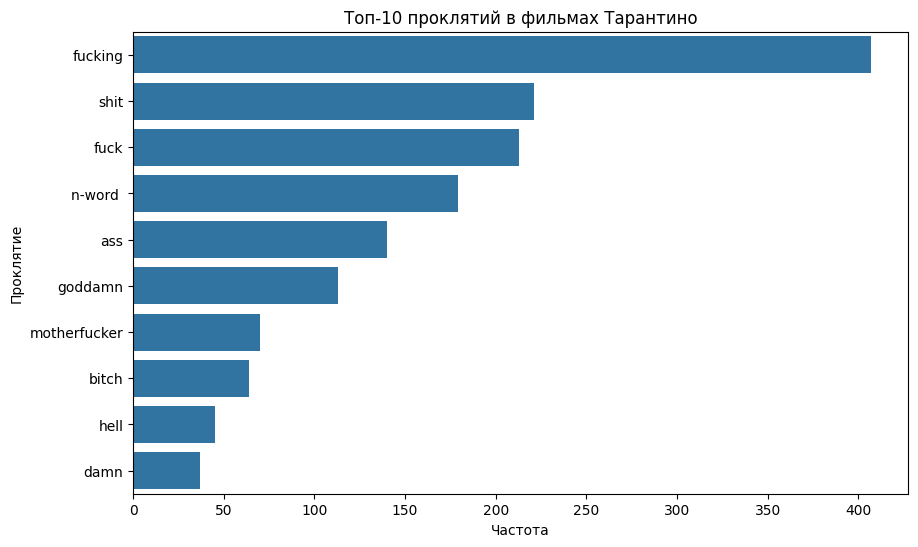

In [163]:
curse_counts = tarantino['word'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=curse_counts.values[:10], y=curse_counts.index[:10])
plt.title('Топ-10 проклятий в фильмах Тарантино')
plt.xlabel('Частота')
plt.ylabel('Проклятие')
plt.show()

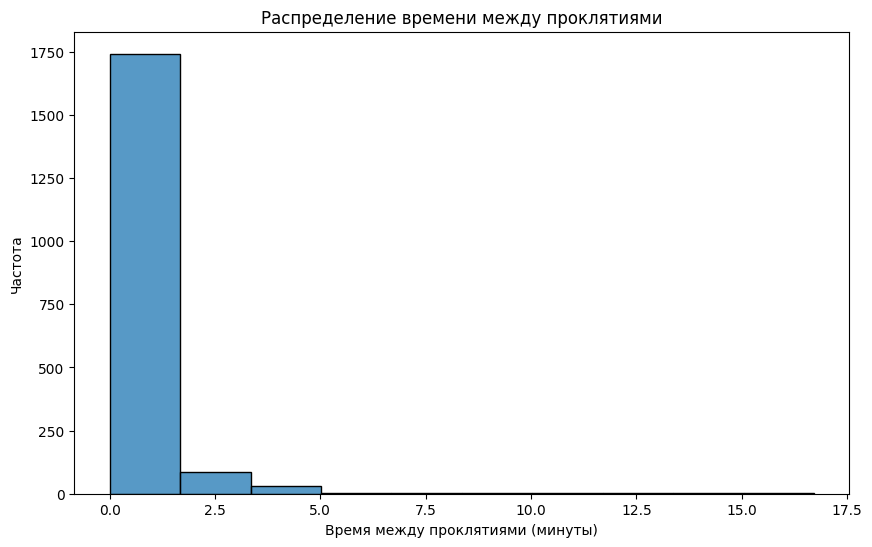

In [168]:
tarantino = tarantino.sort_values(by=['movie', 'minutes_in'])

tarantino['time_diff'] = tarantino.groupby('movie')['minutes_in'].diff()
tarantino = tarantino.dropna(subset=['time_diff'])

plt.figure(figsize=(10, 6))
sns.histplot(tarantino['time_diff'], bins=10)
plt.title('Распределение времени между проклятиями')
plt.xlabel('Время между проклятиями (минуты)')
plt.ylabel('Частота')
plt.show()